In [15]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all" # cell 的多行输出

# 非数值型数据

很多机器学习算法处理都是数字，然而数据可能有非数字类型，常见的做法就是将非数字类型转化为数字类型。

如性别中的“男”和“女”，分别转换为数字1和0

python中常见的方法实现为
- get_dummies 如特征类别多，则会产生很多高纬变量，一般配合PCA使用；如果类别不多，优先考虑。
- LabelEncoder 会产生无意义的关系，但是如果是树模型，这个用LabelEncoder也没关系

## get_dummies 哑变量处理

哑变量也叫虚拟变量，通常取值为0或1

构造哑变量容易产生高维数据，因此，哑变量常和PCA（主成分分析）一起使用，即构造哑变量产生高维数据后采用PCA进行降维。

### 两类别非数字数据

In [2]:
import pandas as pd
df = pd.DataFrame({'客户编号': [1, 2, 3], '性别': ['男', '女', '男']})
df

,客户编号,性别
0,1,男
1,2,女
2,3,男


In [3]:
df=pd.get_dummies(df,columns=['性别'])
df

,客户编号,性别_女,性别_男
0,1,0,1
1,2,1,0
2,3,0,1


但是“性别_女”和“性别_男”这两列存在多重共线性，即知道其中一列的内容，就能知道另一列的内容。

多重共线性会带来一系列问题，因此实际处理中，我们会去掉一列

In [4]:
df=df.drop(columns='性别_男')
df=df.rename(columns={'性别_女':'性别'})
df

,客户编号,性别
0,1,0
1,2,1
2,3,0


### 多类别非数字数据

In [5]:
import pandas as pd
df = pd.DataFrame({'房屋编号': [1, 2, 3, 4, 5], '朝向': ['东', '南',
'西', '北', '南']})
df

,房屋编号,朝向
0,1,东
1,2,南
2,3,西
3,4,北
4,5,南


In [6]:
df=pd.get_dummies(df,columns=['朝向'])
df

,房屋编号,朝向_东,朝向_北,朝向_南,朝向_西
0,1,1,0,0,0
1,2,0,0,1,0
2,3,0,0,0,1
3,4,0,1,0,0
4,5,0,0,1,0


上表同样存在多重共线性（即根据3个朝向的数字就能判断第4个朝向的数字是0还是1），因此需要从新构造出来的4个哑变量中删去1个，假设删去“朝向_西”列，代码如下。

In [7]:
df=df.drop(columns='朝向_西')
df

,房屋编号,朝向_东,朝向_北,朝向_南
0,1,1,0,0
1,2,0,0,1
2,3,0,0,0
3,4,0,1,0
4,5,0,0,1


## Label Encoding编号处理

In [11]:
df = pd.DataFrame({'编号': [1, 2, 3, 4, 5], '城市': ['北京', '上海', '广州', '深圳', '北京']})
df.head()

,编号,城市
0,1,北京
1,2,上海
2,3,广州
3,4,深圳
4,5,北京


In [12]:
from cProfile import label
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
label=le.fit_transform(df['城市'])
df['城市编号']=label
df

,编号,城市,城市编号
0,1,北京,1
1,2,上海,0
2,3,广州,2
3,4,深圳,3
4,5,北京,1


上述示例中使用Label Encoding处理后产生了一个奇怪的现象：上海和广州的平均值是北京，这个现象其实是没有现实意义的

这也是Label Encoding的一个缺点——可能会产生一些没有意义的关系。

不过树模型（如决策树、随机森林及XGBoost等集成算法）能很好地处理这种转化，因此对于树模型来说，这种奇怪的现象是不会影响结果的。

LabelEncoder()函数生成的数字是随机的

如果想按特定内容进行替换，可以使用replace()函数。这两种处理方式对于建模效果不会有太大影响

# 重复值

In [14]:
import pandas as pd
data = pd.DataFrame([[1, 2, 3], [1, 2, 3], [4, 5, 6]], columns=['c1', 'c2', 'c3'])
data

,c1,c2,c3
0,1,2,3
1,1,2,3
2,4,5,6


In [17]:
data.duplicated()

0    False
1     True
2    False
dtype: bool

In [22]:
# 查询重复内容
data[data.duplicated()]

,c1,c2,c3
1,1,2,3


In [23]:
# 统计重复行数
data.duplicated().sum()

1

In [24]:
# 删除重复行
# note：不改变原表结构，需重新赋值或replace=True
data.drop_duplicates()

,c1,c2,c3
0,1,2,3
2,4,5,6


In [25]:
# 按列去重
data.drop_duplicates('c1')

,c1,c2,c3
0,1,2,3
2,4,5,6


# 缺失值

np.nan就代表缺失值，又叫空值

In [26]:
import numpy as np
data = pd.DataFrame([[1, np.nan, 3], [np.nan, 2, np.nan], [1,np.nan, 0]], columns=['c1', 'c2', 'c3'])
data

,c1,c2,c3
0,1.0,NaN,3.0
1,NaN,2.0,NaN
2,1.0,NaN,0.0


## 查看缺失值

isnull()、isna()都可查看空值

In [27]:
data.isnull()

,c1,c2,c3
0,False,True,False
1,True,False,True
2,False,True,False


In [28]:
data.isna()

,c1,c2,c3
0,False,True,False
1,True,False,True
2,False,True,False


In [29]:
# 单列查看空值
data['c1'].isnull()

0    False
1     True
2    False
Name: c1, dtype: bool

In [30]:
# 筛选出某列空值行
data[data['c1'].isnull()]

,c1,c2,c3
1,NaN,2.0,NaN


# 缺失值分析与处理

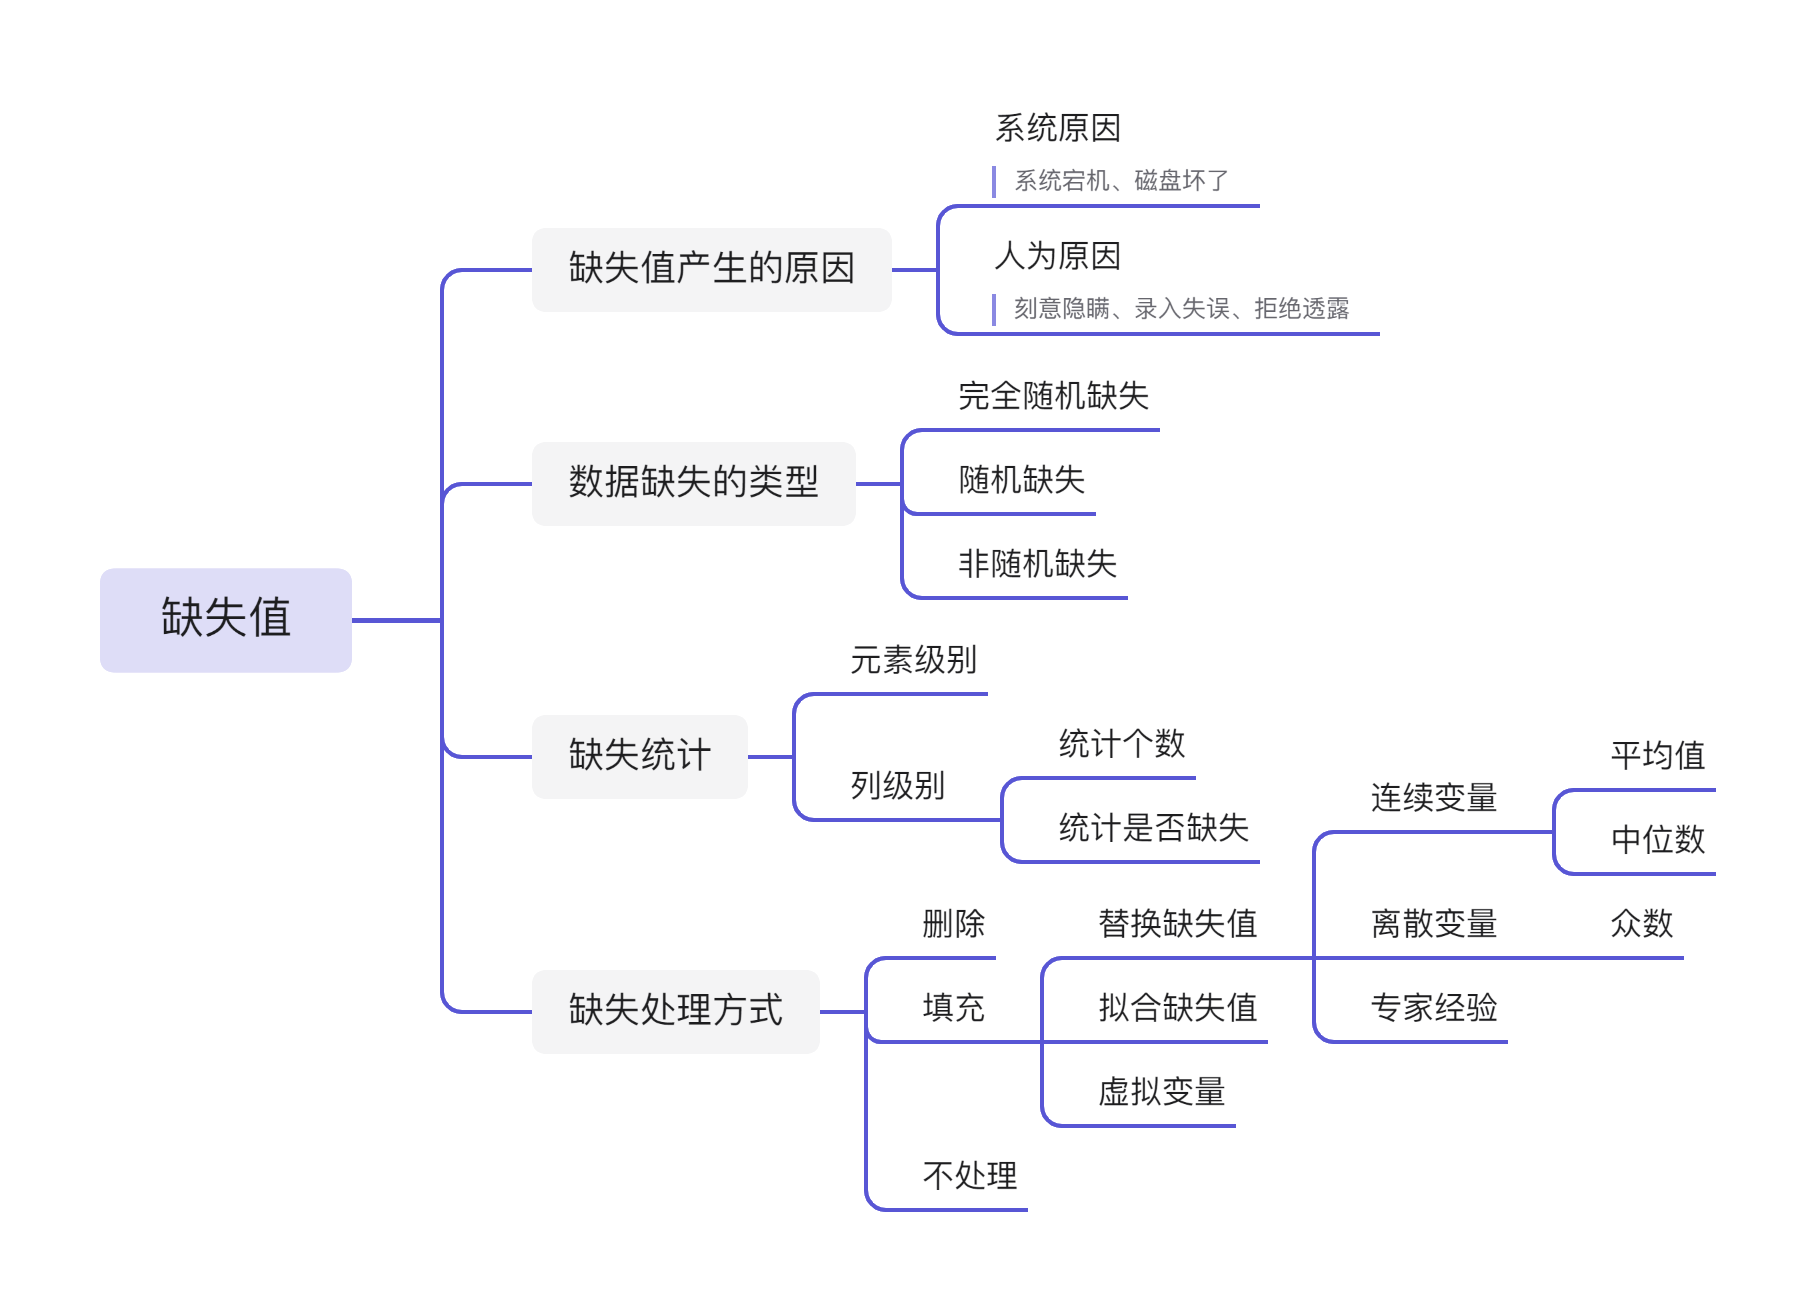

先要了解数据缺失是由什么原因导致的，数据缺失的情况如何，才能更合理地处理缺失数据
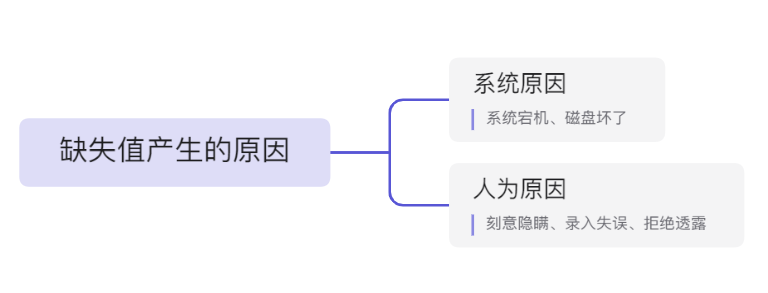

数据缺乏主要分为以下3类。

完全随机缺失（Missing Completely At Random，MCAR）指的是数据的缺失是完全随机的，不依赖于任何不完全变量或完全变量，不影响样本的无偏性，如家庭地址缺失。

随机缺失（Missing At Random，MAR）指的是数据的缺失不是完全随机的，即该类数据的缺失依赖于其他完全变量，如财务数据缺失情况与企业的大小有关。

非随机缺失（Missing Not At Random，MNAR）指的是数据的缺失与不完全变量自身的取值有关，如高收入人群不愿意提供家庭收入数据。

对于随机缺失和非随机缺失，直接删除记录是不合适的。对于随机缺失可以通过已知变量对缺失值进行估计并填充，而对于非随机缺失还没有很好的解决办法。

## 查看缺失值

查看数据缺失的情况主要结合Pandas（统计）和Missingno（可视化）来介绍

### Pandas统计缺失情况

Pandas对象的所有描述性统计默认都不包括缺失数据

元素级别缺失统计

In [54]:
titanic.isnull()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


列级别是否缺失统计

In [55]:
titanic.isnull().any()

survived       False
pclass         False
sex            False
age            False
sibsp          False
parch          False
fare           False
embarked        True
class          False
who            False
adult_male     False
deck            True
embark_town     True
alive          False
alone          False
dtype: bool

列级别缺失个数统计

In [56]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

### Missingno缺失值可视化

Missingno提供了一个灵活且易于使用的缺失值数据可视化的Python库，可以快速直观地查看数据集完整性（或缺失性）的整体情况

<AxesSubplot:>

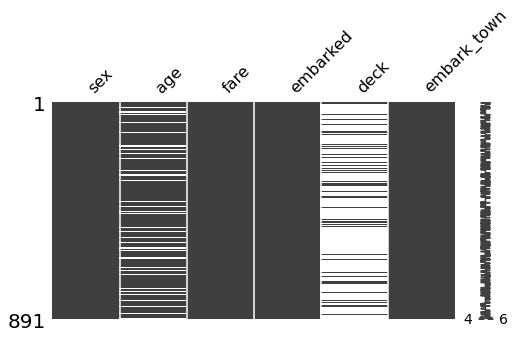

In [61]:
import missingno as msno
#为了展示效果，只选取部分字段，调整了图片和字段大小
msno.matrix(
    df=titanic_df[['sex','age','fare','embarked','deck','embark_town']],
    figsize=(8,4),
    fontsize=16
)

missingno.heatmap查看缺失变量之间的相关性，它将输入的Dataframe通过dataframe.isnull（）生成新的缺失值的Dataframe，然后计算变量缺失值的相关性。热力图可以很直观快速地观察哪些变量经常一起缺失，方便数据核验

<AxesSubplot:>

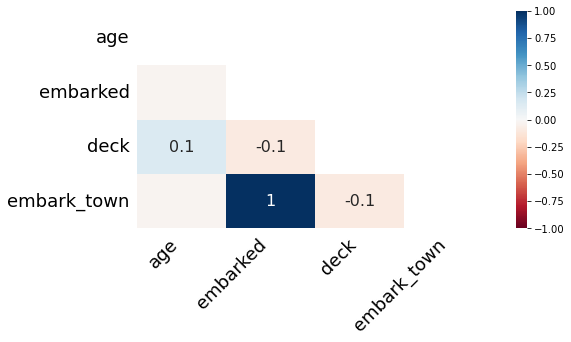

In [63]:
msno.heatmap(df=titanic_df,figsize=(8,4),fontsize=18)

missingno.bar利用条形图可以更直观地看出每个变量缺失的比例和数量情况，接口展示的是每个变量非空值的数量和比例。

<AxesSubplot:>

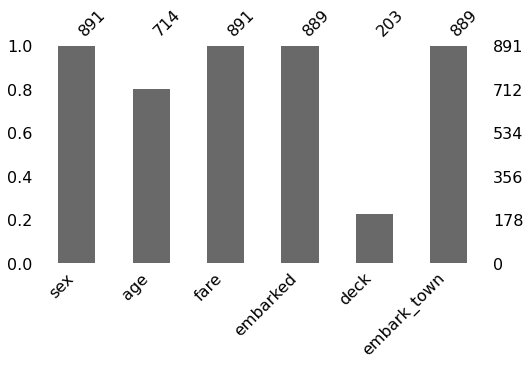

In [64]:
msno.bar(
    df=titanic_df[['sex','age','fare','embarked','deck','embark_town']],
    figsize=(8,4),
    fontsize=16
)

## 处理缺失值

对于主观数据，人将影响数据的真实性，存在缺失值的样本的其他属性值无法保证可靠性，那么依赖于这些属性值的填充也是不可靠的，所以对于主观数据一般不推荐插补的方法

插补主要是针对客观数据

在实际工作中除非数据特征和样本足够多，一般不会只要有缺失值就一定将样本删除，需要计算缺失值的比例以及该变量的区分能力。如果变量的缺失值比例高但是有一定区分能力，则需要结合实际情况考虑保留还是删除

### 删除

In [65]:
titanic.shape

(891, 15)

In [66]:
titanic_row=titanic.dropna(axis=0)
titanic_row.shape

(201, 15)

In [71]:
def drop_nan_stat(df,copy=False,axis=0,nan_threshold=0.9):
    '''按行、列的缺失值比例删除 > 阈值的行、列
    '''
    assert isinstance(df,pd.DataFrame)
    return_df=df.copy() if copy else df
    n_rows,n_cols=return_df.shape

    if axis==0:
        t=return_df.isnull().sum(axis=0)
        t=pd.DataFrame(t,columns=['NumOfNan'])
        t['PctOFNan']=t['NumOfNan']/n_rows
        return_df=return_df.drop(
            labels=t[t.PctOFNan > nan_threshold].index.tolist(),
            axis=1
        )
    elif axis==1:
        t=return_df.isnull().sum(axis=1)
        t=pd.DataFrame(t,columns=['NumOfNan'])
        t['PactOFNan']=t['NumOfNan']/n_cols
        print(t)
        return_df=return_df.drop(
            labels=t[t.PctOFNan > nan_threshold].index.tolist(),
            axis=1
        )
    return return_df

删除缺失值比例大于0.5的列

<AxesSubplot:>

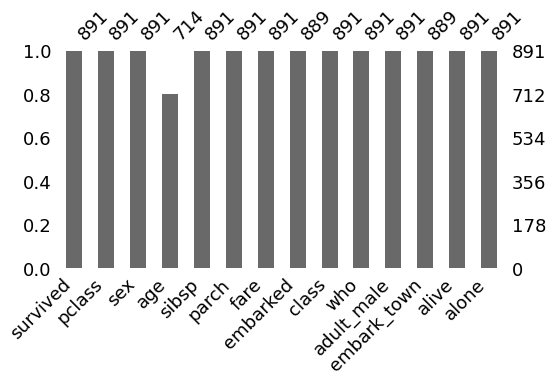

In [72]:
titanic_df_col=drop_nan_stat(
    df=titanic_df,
    copy=True,
    axis=0,
    nan_threshold=0.5
)
msno.bar(df=titanic_df_col,figsize=(8,4),fontsize=18)

### 填充

对缺失值的填充大体可分为3种：替换缺失值、拟合缺失值、虚拟变量。

替换是通过数据中非缺失数据的统计指标或业务经验值填充

拟合是通过其他特征建模来填充

虚拟变量是用衍生的新变量代替缺失值

#### 替换缺失值

In [73]:
titanic_df_fill=titanic_df.copy()
titanic_df_fill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [74]:
titanic_df_fill['age'].fillna(titanic_df_fill['age'].median(),inplace=True)
titanic_df_fill['age'].isnull().any()

False

In [75]:
titanic_df_fill['embarked'].fillna(titanic_df_fill['embarked'].mode()[0],inplace=True)

#### 拟合缺失值

通过构建模型的方式对缺失值进行填充，连续变量的拟合使用回归模型，分类变量的拟合使用分类模型

建模方法为：将原始数据按待填充的列分为两个数据集，一个数据集中该列未缺失，一个数据集中该列缺失。通过在未缺失数据集上建模，预测并填充缺失数据集中的列值。注意，待填充的列作为模型中的y值，实现建模和预测填充

In [77]:
# 以随机森林为例
from sklearn.ensemble import RandomForestRegressor
age_df=titanic_df[['age','fare','parch','sibsp','pclass']].copy()
print(age_df['age'].isnull().any())

True


In [79]:
#按年龄是否缺失，可分为训练数据集和预测数据集
train_df=age_df[age_df.age.notnull()].values
predict_df=age_df[age_df.age.isnull()].values
y=train_df[:,0]
X=train_df[:,1:]

#训练数据集使用RandomForestRegressor训练模型
rf_model=RandomForestRegressor(random_state=42,n_estimators=100)
rf_model.fit(X,y)
#用训练好的模型预测数据集的年龄进行预测
predict_ages=rf_model.predict(predict_df[:,1:])
#预测结果填补原缺失数据
age_df.loc[(age_df.age.isnull()),'age']=predict_ages
print(age_df['age'].isnull().any())

False


#### 虚拟变量

虚拟变量是指通过判断变量值是否有缺失值来生成一个新的二分类变量。比如，列A中特征值缺失，那么生成的列B中的值为True；否则，列B中的值为False

In [80]:
age_df['age']=titanic['age'].copy()

#判断年龄是否缺失，衍生一个新变量age_nan
age_df.loc[(age_df.age.notnull(),'age_nan')]="False"
age_df.loc[(age_df.age.isnull(),'age_nan')]="True"

#统计新变量age_nan缺失和非缺失的数量，可以与之前的缺失值可视化进行缺失值数据核验
age_df['age_nan'].value_counts()

False    891
Name: age_nan, dtype: int64

### 不处理

如果缺失包含了业务含义，那么完全有理由保留该变量，实际处理中可直接将缺失值填充为区别于正常值的默认值，比如-1，也可以用分箱方法，将缺失值单独分为一箱

不同模型对缺失的要求不同，SVM和KNN，其模型原理中涉及了对样本距离的度量，如果缺失值处理不当，最终会导致模型预测效果很差；XGBoost、LightGBM等模型本身就可以应对具有缺失值的数据

# 异常值分析与处理

异常值（Outlier）是指那些在数据中明显与其他数值偏离的少量数值，可以通过统计检测（如三西格玛检测）和可视化（如箱型图）发现

日常的数据分析中经常会遇到异常值，要慎重处理


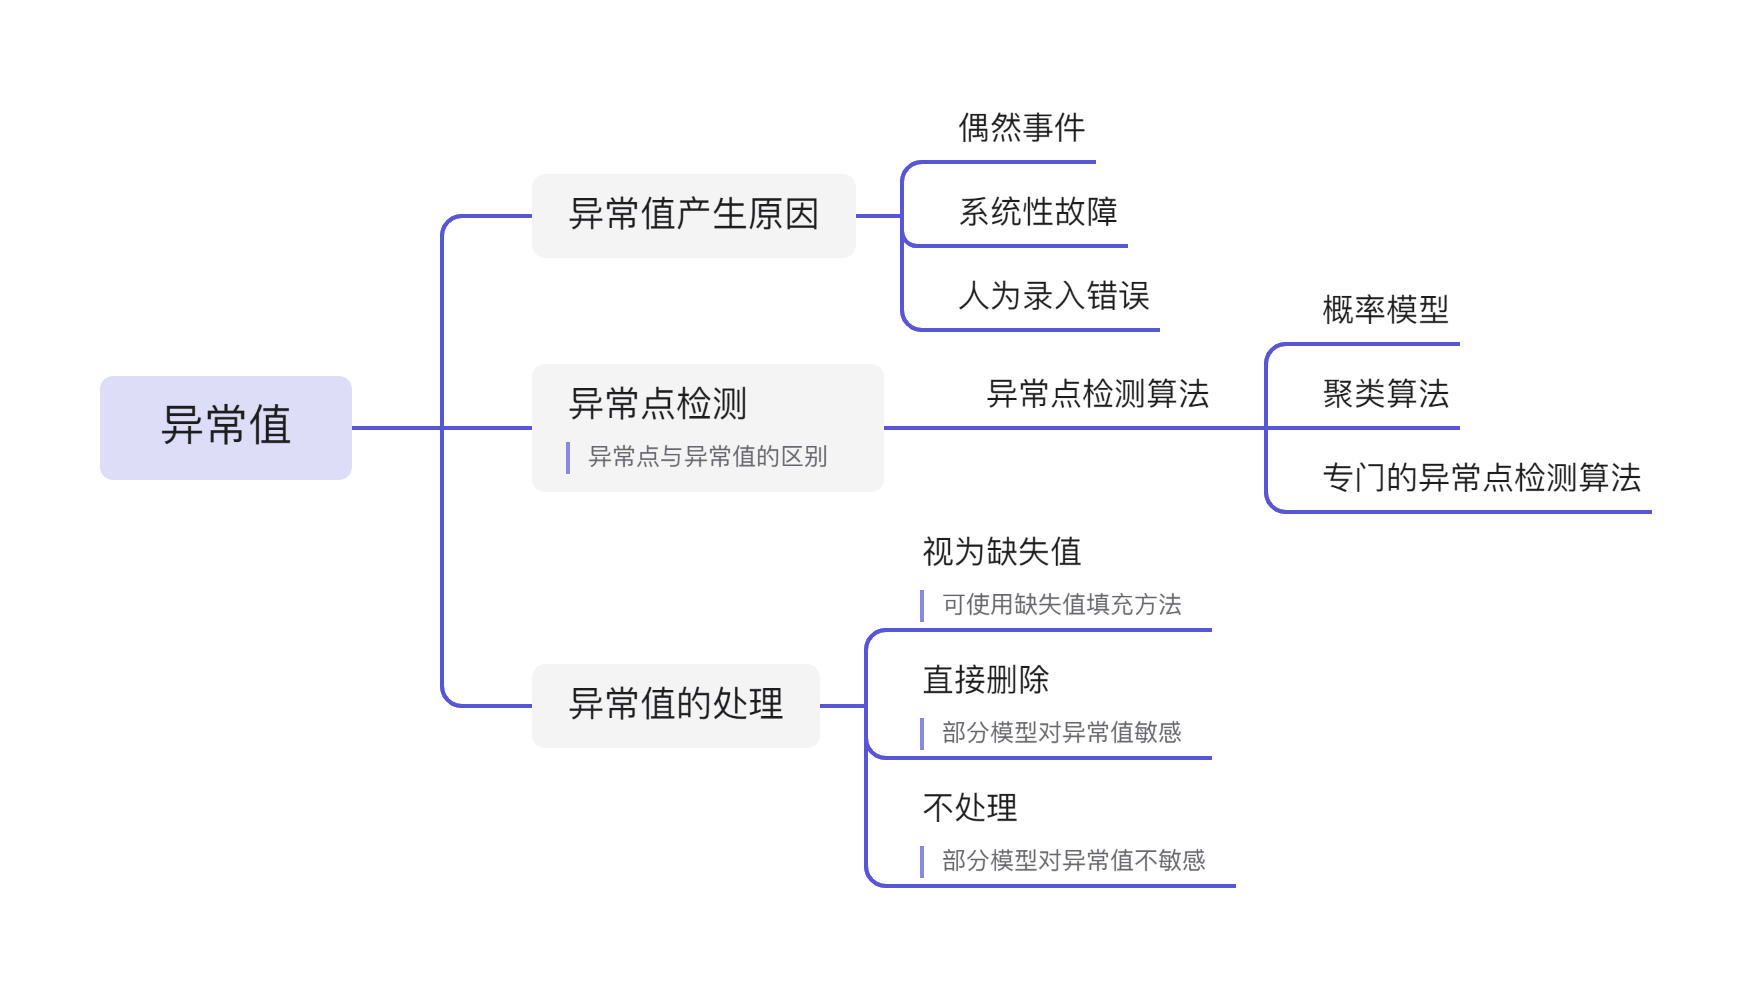
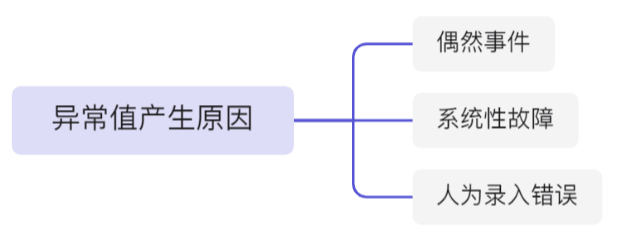

## 查看异常

检测方法找到的异常值并不是绝对准确的，具体情况还需根据业务的理解加以判断

### 异常值检测

#### pd.describe

异常值统计检测方法可直接使用pandas.describe进行大致浏览

#### 三西格玛检测

数据服从正态分布时可使用三西格玛检测异常值

99%的数值应该位于均值3个标准差之内，即P（|x-μ|＞3σ）≤0.003，如果数值超出这个范围，可以认为它是异常值

在判断异常值之前需要计算z分数（Z-score），它也叫标准分数（StandardScore）

标准分数是一个观测或数据点的值高于被观测值或测量值的平均值的标准偏差的符号数，在平均数之上的分数会得到一个正的标准分数，在平均数之下的分数会得到一个负的标准分数，通过标准分数可以看出数据点在分布中的相对位置

In [83]:
#只选取上述泰坦尼克数据集的3个字段作为案例展示
columns=['pclass' , 'age' , 'fare']
for var in columns:
    titanic_df[var+'_zscore']=(titanic_df[var]-titanic_df[var].mean())/titanic_df[var].std()
    z_normal=abs(titanic_df[var+'_zscore'])>3
    print(var+'中有'+str(z_normal.sum())+'个异常值')

pclass中有0个异常值
age中有2个异常值
fare中有20个异常值


#### 箱线图

箱线图中，上下界之外的值可视为异常值。

IQR（差值）=U（上四分位数）-L（下四分位数），上界=U+1.5IQR，下界=L-1.5IQR。这也是Tukey异常值检测方法

In [85]:
for var in columns:
    iqr=titanic_df[var].quantile(0.75)-titanic_df[var].quantile(0.25)
    q_abnormal_L=titanic_df[var]<titanic_df[var].quantile(0.25)-1.5*iqr
    q_abnormal_U=titanic_df[var]>titanic_df[var].quantile(0.75)+1.5*iqr
    print(var+'中有'+str(q_abnormal_L.sum()+q_abnormal_U.sum())+'个异常值')

pclass中有0个异常值
age中有11个异常值
fare中有116个异常值


### 异常点检测

异常点检测与异常值检测主要的区别在于：异常值针对单一变量，而异常点则是针对多变量

异常点检测（又称离群点检测）是通过多种检测方法找出数据集中与大多数数据有明显差异的数据点，这些数据点被称为异常点或者离群点

常见的异常点检测算法有基于统计的概率模型、聚类算法、专门的异常点检测算法等

以聚类算法为例介绍异常点的检测

异常点检测和聚类分析是两项高度相似的任务，但目的不同。聚类分析发现数据集中的模式，而异常点检测则试图捕捉那些显著偏离多数模式的异常情况。基于聚类的异常点检测是用聚类方式将数据划分为不同的簇，计算簇内每个点与簇中心的相对距离（相对距离等于点到簇中心的距离除以这个簇所有点到簇中心距离的中位数），相对距离较大的点被视为异常点。注意，距离度量使用的是所有点到簇中心距离的中位数，而不是平均值，因为异常值对中位数的影响很小，但是对均值的影响较大

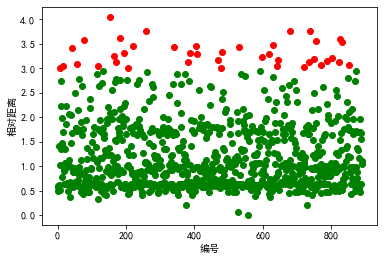

In [87]:
from sklearn.cluster import KMeans
#修改Matplotlib配置参数支持中文显示
plt.rcParams['font.family']='SimHei'
#聚类的类别
k=3
#异常点阈值
threshold=3
#读取已经填充过空值的数据
data=titanic[['pclass','age','fare']].copy()
#数据标准化
data_zs=1.0*(data-data.mean())/data.std()
#使用聚类模型聚类
model=KMeans(n_clusters=3,max_iter=500)
model.fit(data_zs)
#标准化数据及其类别
r=pd.concat([data_zs,pd.Series(model.labels_,index=data.index)],axis=1)
r.columns=list(data.columns)+['聚类类别']

#计算相对距离
norm=[]
for i in range(k):
    norm_tmp=r[['pclass','age','fare']][r['聚类类别']==i]-model.cluster_centers_[i]
    norm_tmp=norm_tmp.apply(np.linalg.norm,axis=1)
    norm.append(norm_tmp/norm_tmp.median())

norm=pd.concat(norm)
#正常点,相对距离小于或等于异常点阈值
norm[norm <= threshold].plot(style = 'go')
# 异常点，相对距离大于异常点阈值
discrete_points = norm[norm >threshold]
discrete_points.plot(style = 'ro')
plt.xlabel('编号')
plt.ylabel('相对距离')
plt.show()

In [88]:
discrete_points=norm[norm>threshold]
discrete_points.index

Int64Index([851, 258, 679, 737,   7,  16,  43,  58,  78, 119, 152, 164, 172,
            183, 193, 205, 222, 340, 381, 386, 406, 407, 469, 479, 482, 530,
            597, 618, 631, 642, 644, 720, 736, 750, 755, 771, 788, 803, 824,
            827, 831],
           dtype='int64')

## 异常值的处理

上述检测方法找到的异常值并不是绝对准确的，具体情况还需根据业务的理解加以判断

异常值进行处理也需结合实际情况